In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sys import stdout

In [3]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Global PLSR

In [4]:
Total_X_data = pd.read_csv("X_data.csv")
Total_Y_data = pd.read_csv("Y_data_voltage.csv")

Total_X_data.drop("Unnamed: 0", axis=1, inplace=True)
Total_Y_data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [6]:
X_data = Total_X_data[1068:]
Y_data = Total_Y_data[1068:]

## Scaling and splitting the X_data and Y_data

In [7]:
scaler_x = StandardScaler().fit(X_data)
scaler_y = StandardScaler().fit(Y_data)

X_data = scaler_x.transform(X_data)
Y_data = scaler_y.transform(Y_data)

In [8]:
X_data

array([[-1.14955359e+00, -1.10319564e+00,  1.30369352e-01, ...,
         1.28923763e+00, -1.44543133e+00,  1.72684630e+00],
       [ 5.89295984e-01, -9.44241236e-01, -1.62083958e+00, ...,
        -3.63682478e-01,  1.32434612e+00,  1.03999608e+00],
       [ 9.09610346e-01, -1.59867768e+00, -1.19346753e+00, ...,
        -1.12898833e+00, -5.87891388e-01, -5.07227755e-01],
       ...,
       [ 8.98993485e-01, -7.45896139e-04, -5.08781753e-01, ...,
         7.70895116e-01, -7.65495875e-01,  7.22655906e-01],
       [ 3.58513426e-01,  1.18161807e+00, -1.48958987e+00, ...,
         1.12434672e+00, -1.53420078e+00, -1.10967478e+00],
       [-6.76472643e-01, -9.23717539e-01,  1.45481438e+00, ...,
        -3.20371935e-01,  1.11780395e+00, -1.17143884e+00]])

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_data,Y_data,test_size=0.2,random_state=357, shuffle=True)

## Finding optimal number of PLS components for global Model

In [10]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp, max_iter=1000)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
   
    
    return (y_cv, r2, mse)

In [11]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 31)
for n_comp in xticks:
    y_cv, r2, mse = optimise_pls_cv(X_data, Y_data, n_comp)
    r2s.append(r2)
    mses.append(mse)
   

In [13]:
# test with 30 components
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 15)
for n_comp in xticks:
    y_cv, r2, mse = optimise_pls_cv(X_data, Y_data, n_comp)
    r2s.append(r2)
    mses.append(mse)
   


In [14]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

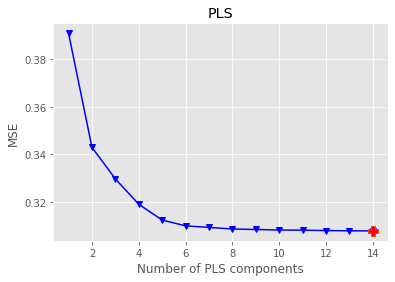

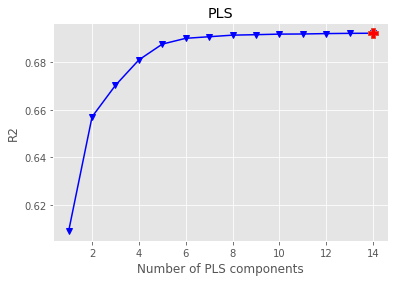

In [15]:

plot_metrics(mses, 'MSE', 'min')
plot_metrics(r2s, 'R2', 'max')

## Predictions from global PLSR

In [15]:
global_pls = PLSRegression(n_components=6)

# Fit
global_pls.fit(X_data, Y_data)

# Cross-validation
y_cv = cross_val_predict(global_pls, X_data, Y_data, cv=10)

# Calculate scores
score = r2_score(Y_data, y_cv)
mse = mean_squared_error(Y_data, y_cv)

In [16]:
score

0.6901579548033601

In [17]:
mse

0.30984204519664

In [18]:
 import hoggorm as ho

In [19]:
X_data

array([[-1.14955359e+00, -1.10319564e+00,  1.30369352e-01, ...,
         1.28923763e+00, -1.44543133e+00,  1.72684630e+00],
       [ 5.89295984e-01, -9.44241236e-01, -1.62083958e+00, ...,
        -3.63682478e-01,  1.32434612e+00,  1.03999608e+00],
       [ 9.09610346e-01, -1.59867768e+00, -1.19346753e+00, ...,
        -1.12898833e+00, -5.87891388e-01, -5.07227755e-01],
       ...,
       [ 8.98993485e-01, -7.45896139e-04, -5.08781753e-01, ...,
         7.70895116e-01, -7.65495875e-01,  7.22655906e-01],
       [ 3.58513426e-01,  1.18161807e+00, -1.48958987e+00, ...,
         1.12434672e+00, -1.53420078e+00, -1.10967478e+00],
       [-6.76472643e-01, -9.23717539e-01,  1.45481438e+00, ...,
        -3.20371935e-01,  1.11780395e+00, -1.17143884e+00]])

In [20]:
Y_data

array([[-1.        , -0.24858787, -0.29769401, ..., -0.82159892,
        -0.82122179, -0.82084937],
       [-1.        ,  1.03681513,  0.96804286, ..., -0.72703746,
        -0.72664743, -0.72625924],
       [-1.        ,  1.04637051,  0.9566555 , ..., -0.69037094,
        -0.68994873, -0.68952912],
       ...,
       [-1.        ,  0.94368903,  0.81471604, ..., -0.74343499,
        -0.74288501, -0.74233901],
       [-1.        ,  0.76447634,  0.37729806, ..., -0.80063006,
        -0.80029361, -0.7999603 ],
       [-1.        ,  1.50851009,  1.23285853, ..., -0.71075684,
        -0.71025367, -0.70975364]])

In [21]:
# model = ho.nipalsPLS2(arrX=X_data.values, arrY=Y_data.values, cvType=["KFold", 10])

In [22]:
# Y_cumulativeValidatedExplainedVariance_total = model.Y_cumCalExplVar()

In [23]:
# Y_cumulativeValidatedExplainedVariance_total

In [24]:
##predictions

In [25]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [26]:
Test_X_data = scaler_x.transform(X_test)
Test_Y_data = scaler_y.transform(Y_test)

In [27]:
ypred2 = global_pls.predict(Test_X_data)
print(r2_score(Test_Y_data,ypred2))

0.6977686943349749


## Getting global X and Y scores

In [28]:
X_scores = global_pls.x_scores_
Y_scores = global_pls.y_scores_

In [29]:
X_scores.shape

(4276, 6)

In [30]:
Y_scores.shape

(4276, 6)

In [31]:
#initial plot

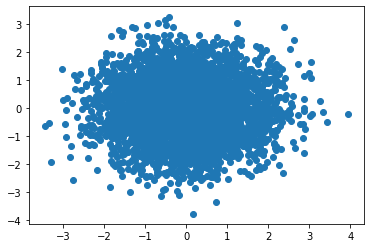

In [32]:
plt.scatter(X_scores[:,0], X_scores[:,1])

## Clustering with X_scores

In [34]:
 from sklearn.cluster import KMeans

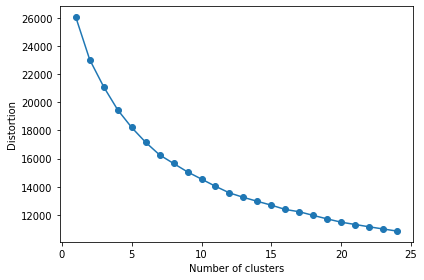

In [35]:
distortions = []
for i in range(1, 25):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    y_km = km.fit(X_scores)
    distortions.append(km.inertia_)
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()


No distinct number of clusters. Hence, with random trials from 5-10. The best performance accuray obtaine dfrom 5 clusters.

In [40]:
y_km

array([3, 4, 3, ..., 3, 2, 3])

In [41]:
X_score_df = pd.DataFrame(X_scores)

In [42]:
X_score_df

,0,1,2,3,4,5
0,0.221400,-0.044361,0.935285,-0.689157,-0.580358,-2.693347
1,-0.310857,0.959016,1.493682,1.179644,0.776382,0.667562
2,-0.706394,0.029975,0.523013,0.793464,0.385930,-1.964311
3,0.212671,1.206441,-0.975154,0.312694,0.744631,-0.457990
4,-0.271984,0.002554,-0.731349,-0.265434,1.331374,0.875549
...,...,...,...,...,...,...
4271,-0.367276,0.114907,0.580364,0.021703,-1.019300,-1.042066
4272,-0.298043,-0.567356,1.063432,-1.484748,0.788543,-0.192768
4273,-1.817643,0.447374,1.101776,1.559630,-0.656175,-0.810200
4274,-0.582953,-0.567645,0.317722,-0.121253,-0.159047,0.451538


In [43]:
X_score_df['Cluster'] = y_km

In [44]:
X_cluster_df = X_score_df

In [45]:
X_cluster_df

,0,1,2,3,4,5,Cluster
0,0.221400,-0.044361,0.935285,-0.689157,-0.580358,-2.693347,3
1,-0.310857,0.959016,1.493682,1.179644,0.776382,0.667562,4
2,-0.706394,0.029975,0.523013,0.793464,0.385930,-1.964311,3
3,0.212671,1.206441,-0.975154,0.312694,0.744631,-0.457990,4
4,-0.271984,0.002554,-0.731349,-0.265434,1.331374,0.875549,0
...,...,...,...,...,...,...,...
4271,-0.367276,0.114907,0.580364,0.021703,-1.019300,-1.042066,3
4272,-0.298043,-0.567356,1.063432,-1.484748,0.788543,-0.192768,0
4273,-1.817643,0.447374,1.101776,1.559630,-0.656175,-0.810200,3
4274,-0.582953,-0.567645,0.317722,-0.121253,-0.159047,0.451538,2


### Creating four dataframes having different cluster labels

In [46]:
X_cluster_1 = X_cluster_df.loc[X_cluster_df['Cluster'] == 1]

In [47]:
X_cluster_0 = X_cluster_df.loc[X_cluster_df['Cluster'] == 0]

In [48]:
X_cluster_2 = X_cluster_df.loc[X_cluster_df['Cluster'] == 2]

In [49]:
X_cluster_3 = X_cluster_df.loc[X_cluster_df['Cluster'] == 3]

In [50]:
X_cluster_4 = X_cluster_df.loc[X_cluster_df['Cluster'] == 4]

In [52]:
X_cluster_1.shape

(871, 7)

In [53]:
X_cluster_1.head()

,0,1,2,3,4,5,Cluster
5,-0.353752,-0.362502,1.349825,0.833363,-0.013692,-0.992362,1
9,1.368426,-1.309336,0.033802,-0.435948,0.335166,-0.938933,1
20,0.576341,-0.918348,1.264746,0.759341,-0.546535,-0.671419,1
21,0.702095,-0.360861,-1.273495,2.118636,0.762912,-0.890338,1
26,1.434182,0.076440,1.790639,0.164618,-1.010228,-1.053531,1


## Creating new X and Y dataset for local PLSR

## PLSR 0

In [54]:
X_cluster_0 = pd.DataFrame(X_cluster_0)
Y_data= pd.DataFrame(Y_data)
X_data = pd.DataFrame(X_data)

In [55]:
Y_data_0= Y_data[Y_data.index.isin(X_cluster_0.index)]
X_data_0= X_data[X_data.index.isin(X_cluster_0.index)]

In [56]:
X_data_0

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
4,1.129809,-1.399249,0.643397,-1.245184,0.406455,-1.044067,0.482879,-0.330910,-0.966304,0.086200,...,-1.031188,-0.455676,-0.851547,1.319269,0.135531,0.859078,1.069689,-0.557350,0.594043,1.103531
6,1.437352,0.826366,0.279842,-1.327800,-0.279721,-0.708889,1.420378,-1.418999,0.850523,-0.397844,...,-1.543046,0.304290,0.281469,-0.682183,-0.343846,-0.880121,0.211086,0.494161,-1.249679,-1.371469
12,0.903739,-0.628452,0.938453,-1.729745,0.793008,0.302004,1.067883,1.363517,0.251666,0.555543,...,-1.685641,-0.594923,0.157635,0.370433,-1.436462,-1.206742,-1.054527,0.995601,0.369722,0.779405
13,-0.549674,0.772151,1.708289,-0.220262,-0.385408,0.105805,-1.441206,-0.964755,-1.477128,-1.171075,...,-1.333906,-0.171287,-0.416277,-1.683537,-0.567401,-1.128070,0.022186,1.699648,0.527985,0.078714
14,-0.333072,-1.250760,0.818847,-0.264448,0.338891,-0.432225,1.710183,1.010351,-0.103322,-0.762475,...,-1.654001,-0.904339,0.825581,1.603883,1.569055,-0.411421,0.719627,-0.836899,-1.158494,0.337115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,0.501694,1.714907,1.044137,0.236664,1.416840,0.635243,-0.493111,-0.626834,-1.182380,-0.484164,...,0.216860,1.010134,-1.381568,-1.347110,1.716876,0.108824,-0.875963,0.287310,0.847181,1.085039
4261,-0.462716,-1.581128,1.198276,-0.014305,0.577641,0.068201,1.381617,-1.193756,-0.359792,0.630630,...,-1.600272,-0.050625,-1.519604,-0.433073,1.640525,-1.194750,-1.390638,-1.627724,-0.075259,-0.589388
4267,0.395657,-1.037746,-1.066277,-0.418530,1.116998,0.331086,0.067527,-1.429968,1.199817,0.744989,...,0.015586,-0.098668,0.507850,1.001324,1.737762,-0.183151,0.630915,-0.233846,-1.173960,0.974101
4270,0.757833,0.400416,1.438290,0.926677,0.232232,1.163494,1.025368,-1.331150,-0.060494,-0.165779,...,1.369953,-0.076640,-0.015022,0.703976,0.645371,1.249917,-0.622852,1.694851,1.238456,-1.510396


In [57]:
Y_data_0

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
4,-1.0,-0.686690,-0.710059,-0.562853,-0.304318,-0.580237,0.352191,-0.166342,-0.616980,-0.631155,...,-0.984092,-0.983724,-0.983359,-0.982995,-0.982637,-0.982285,-0.981938,-0.981594,-0.981251,-0.980912
6,-1.0,-1.439717,-1.290240,-0.805364,-0.305306,-0.557828,0.277775,-0.157540,-0.889602,-0.944510,...,0.481996,0.485178,0.488718,0.492620,0.496878,0.501469,0.506373,0.511570,0.517045,0.522777
12,-1.0,2.033510,1.910552,1.323889,0.487250,2.348706,0.524445,-1.598744,-2.309405,-1.911796,...,-0.665378,-0.665481,-0.665580,-0.665671,-0.665756,-0.665838,-0.665916,-0.665988,-0.666051,-0.666106
13,-1.0,-1.118457,-1.133904,-0.886406,-0.429138,-0.676678,-0.236370,0.163774,0.618261,0.780477,...,-0.482292,-0.484304,-0.486338,-0.488390,-0.490457,-0.492544,-0.494649,-0.496770,-0.498902,-0.501046
14,-1.0,1.261873,0.989799,0.535442,0.072146,1.056074,0.710956,-0.575329,-1.278280,-1.111130,...,1.257054,1.258604,1.260111,1.261598,1.263077,1.264541,1.265984,1.267407,1.268822,1.270243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,-1.0,-1.673910,-1.911345,-1.610239,-0.711638,-0.810578,-2.772767,-0.818978,0.585820,0.596628,...,1.650917,1.650758,1.650561,1.650353,1.650148,1.649936,1.649713,1.649478,1.649246,1.649031
4261,-1.0,-0.385760,0.035776,0.310274,0.104364,0.052294,0.479099,-0.715578,-0.928401,-0.517417,...,1.698119,1.698587,1.699015,1.699430,1.699847,1.700257,1.700653,1.701037,1.701422,1.701824
4267,-1.0,-1.345766,-1.101574,-0.700519,-0.320310,-0.593908,0.512492,1.139435,0.806009,0.480900,...,-0.213467,-0.226393,-0.239218,-0.251939,-0.264564,-0.277103,-0.289565,-0.301956,-0.314279,-0.326541
4270,-1.0,-1.282485,-1.235559,-0.907357,-0.415745,-0.657813,0.223853,0.296144,-0.544883,-0.575123,...,0.221164,0.196475,0.172580,0.149469,0.127120,0.105503,0.084591,0.064361,0.044794,0.025871


## Following similar procedure for creating X and Y dataset for PLSR 1

In [58]:
X_cluster_1 = pd.DataFrame(X_cluster_1)

In [59]:
Y_data_1= Y_data[Y_data.index.isin(X_cluster_1.index)]
X_data_1= X_data[X_data.index.isin(X_cluster_1.index)]

## Following similar procedure for creating X and Y dataset for PLSR 2 ,3 and 4

In [60]:
X_cluster_2 = pd.DataFrame(X_cluster_2)

In [61]:
Y_data_2= Y_data[Y_data.index.isin(X_cluster_2.index)]
X_data_2= X_data[X_data.index.isin(X_cluster_2.index)]

In [62]:
X_cluster_3 = pd.DataFrame(X_cluster_3)

In [63]:
Y_data_3= Y_data[Y_data.index.isin(X_cluster_3.index)]
X_data_3= X_data[X_data.index.isin(X_cluster_3.index)]

In [64]:
X_cluster_4 = pd.DataFrame(X_cluster_4)

In [65]:
Y_data_4= Y_data[Y_data.index.isin(X_cluster_4.index)]
X_data_4= X_data[X_data.index.isin(X_cluster_4.index)]

In [66]:
# X_cluster_5 = pd.DataFrame(X_cluster_5)

In [67]:
# Y_data_5= Y_data[Y_data.index.isin(X_cluster_5.index)]
# X_data_5= X_data[X_data.index.isin(X_cluster_5.index)]

### Training PLSR 0,1,2,3 and 4

In [68]:
## Training the whole

In [70]:
local_pls_0 = PLSRegression(n_components=18)

# Fit
local_pls_0.fit(X_data_0, Y_data_0)

# Cross-validation
y_cv = cross_val_predict(local_pls_0, X_data_0, Y_data_0, cv=10)

# Calculate scores
score = r2_score(Y_data_0, y_cv)
mse = mean_squared_error(Y_data_0, y_cv)

In [71]:
score

0.6959203754195593

In [72]:
mse

0.3062439639050982

## Training PLSR 1

In [73]:
## Training whole

In [75]:
local_pls_1 = PLSRegression(n_components=16)

# Fit
local_pls_1.fit(X_data_1, Y_data_1)

# Cross-validation
y_cv = cross_val_predict(local_pls_1, X_data_1, Y_data_1, cv=10)

# Calculate scores
score = r2_score(Y_data_1, y_cv)
mse = mean_squared_error(Y_data_1, y_cv)

In [76]:
score

0.6878960979763089

In [77]:
mse

0.29350651931211247

## Training PLSR 2

In [79]:
local_pls_2 = PLSRegression(n_components=17)

# Fit
local_pls_2.fit(X_data_2, Y_data_2)

# Cross-validation
y_cv = cross_val_predict(local_pls_2, X_data_2, Y_data_2, cv=10)

# Calculate scores
score = r2_score(Y_data_2, y_cv)
mse = mean_squared_error(Y_data_2, y_cv)

In [80]:
score

0.6075116809507738

In [81]:
mse

0.31362678637889096

## Training PLSR 3

In [83]:
local_pls_3 = PLSRegression(n_components=30)

# Fit
local_pls_3.fit(X_data_3, Y_data_3)

# Cross-validation
y_cv = cross_val_predict(local_pls_3, X_data_3, Y_data_3, cv=10)

# Calculate scores
score = r2_score(Y_data_3, y_cv)
mse = mean_squared_error(Y_data_3, y_cv)

In [84]:
score

0.48255351113125244

In [85]:
mse

0.29571996668413847

### Training PLSR 4

In [87]:
local_pls_4 = PLSRegression(n_components=19)

# Fit
local_pls_4.fit(X_data_4, Y_data_4)

# Cross-validation
y_cv = cross_val_predict(local_pls_4, X_data_4, Y_data_4, cv=10)

# Calculate scores
score = r2_score(Y_data_4, y_cv)
mse = mean_squared_error(Y_data_4, y_cv)

In [88]:
score

0.6929139459126543

In [89]:
mse

0.21739929502189753

### HCPLSR Predictions

In [91]:
## scaling the test data from global scaler

In [92]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [93]:
Test_X_data = scaler_x.transform(X_test)

In [94]:
## predicted y_data

In [95]:
ypred_global = global_pls.predict(Test_X_data)

## Classification Algorithm with X

In [96]:
target = X_cluster_df.Cluster

In [97]:
X_cluster_df

,0,1,2,3,4,5,Cluster
0,0.221400,-0.044361,0.935285,-0.689157,-0.580358,-2.693347,3
1,-0.310857,0.959016,1.493682,1.179644,0.776382,0.667562,4
2,-0.706394,0.029975,0.523013,0.793464,0.385930,-1.964311,3
3,0.212671,1.206441,-0.975154,0.312694,0.744631,-0.457990,4
4,-0.271984,0.002554,-0.731349,-0.265434,1.331374,0.875549,0
...,...,...,...,...,...,...,...
4271,-0.367276,0.114907,0.580364,0.021703,-1.019300,-1.042066,3
4272,-0.298043,-0.567356,1.063432,-1.484748,0.788543,-0.192768,0
4273,-1.817643,0.447374,1.101776,1.559630,-0.656175,-0.810200,3
4274,-0.582953,-0.567645,0.317722,-0.121253,-0.159047,0.451538,2


In [98]:
data =X_cluster_df.drop(["Cluster"], axis=1)

In [99]:
data

,0,1,2,3,4,5
0,0.221400,-0.044361,0.935285,-0.689157,-0.580358,-2.693347
1,-0.310857,0.959016,1.493682,1.179644,0.776382,0.667562
2,-0.706394,0.029975,0.523013,0.793464,0.385930,-1.964311
3,0.212671,1.206441,-0.975154,0.312694,0.744631,-0.457990
4,-0.271984,0.002554,-0.731349,-0.265434,1.331374,0.875549
...,...,...,...,...,...,...
4271,-0.367276,0.114907,0.580364,0.021703,-1.019300,-1.042066
4272,-0.298043,-0.567356,1.063432,-1.484748,0.788543,-0.192768
4273,-1.817643,0.447374,1.101776,1.559630,-0.656175,-0.810200
4274,-0.582953,-0.567645,0.317722,-0.121253,-0.159047,0.451538


In [100]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, random_state=0, shuffle=True, test_size=0.3)

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA()),

			('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA()),

			('clf', svm.SVC(random_state=42))])

pipe_dt = Pipeline([

			('clf', tree.DecisionTreeClassifier(random_state=42))])

pipe_KNN = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA()),

			('clf', KNeighborsClassifier(n_neighbors=3))])

pipe_RF = Pipeline([

			('clf', RandomForestClassifier(random_state=42))])


# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt, pipe_KNN, pipe_RF]
			
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree', 3:'KNN', 4:'Random Forest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(train_data, train_labels)

# Compare accuracies
for idx, val in enumerate(pipelines):
	print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(test_data, test_labels)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(test_data, test_labels) > best_acc:
		best_acc = val.score(test_data, test_labels)
		best_pipe = val
		best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

C:\Users\Ashesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression pipeline test accuracy: 0.994
Support Vector Machine pipeline test accuracy: 0.966
Decision Tree pipeline test accuracy: 0.790
KNN pipeline test accuracy: 0.833
Random Forest pipeline test accuracy: 0.894
Classifier with best accuracy: Logistic Regression


## Training whole data

In [114]:
lr_whole = LogisticRegression()

In [115]:
lr_whole.fit(data, target)

LogisticRegression()

### predicting class labels

In [116]:
global_x_weights = global_pls.x_weights_

In [117]:
Test_X_data

array([[-1.0511255 ,  1.44899485,  0.95959703, ...,  0.76370733,
         0.80519979,  0.45480522],
       [ 1.26341898,  0.74620904, -0.23286662, ..., -0.23116333,
        -0.83109032,  0.37200117],
       [ 0.80200898, -1.54219358, -0.98461002, ...,  0.61372948,
        -0.4345646 ,  0.04438796],
       ...,
       [ 0.84134831,  1.26298934,  0.54188917, ...,  1.01964696,
         1.40335163, -0.18085337],
       [-0.42963529, -0.1432256 , -0.02004518, ..., -1.70000438,
        -0.37569325,  1.00258156],
       [ 1.29396861,  0.57442155, -0.83468859, ..., -1.52161002,
        -0.54762489,  0.02775884]])

In [118]:
X_scores_proj = np.dot(Test_X_data,global_x_weights)

In [119]:
X_scores_proj

array([[ 0.19168291,  0.25471092,  1.4765543 ,  0.69481197,  0.09720428,
         0.40506454],
       [-0.40524343,  0.7762246 , -0.10753028, -0.98029726,  1.21626318,
         0.8557125 ],
       [-1.90038713,  0.30778711, -0.34082952, -0.67377823,  0.31240173,
        -0.64015976],
       ...,
       [ 0.58941072, -0.48462193,  0.21839238,  0.31348974, -1.1776711 ,
         0.74340496],
       [ 0.07593352, -0.82879045, -1.54401407, -1.46752801, -0.14125355,
         0.95975854],
       [-2.1568379 , -0.29716594,  0.13177543,  1.57671505, -0.42535869,
        -1.10565637]])

In [120]:
pred_lr = lr_whole.predict(X_scores_proj)

In [121]:
pred_lr.shape

(1068,)

In [122]:
## Appending this to the projected_X_scores

In [123]:
projected_X_scores = pd.DataFrame(X_scores_proj)

In [124]:
projected_X_scores['Cluster'] = pred_lr

In [125]:
projected_X_scores


,0,1,2,3,4,5,Cluster
0,0.191683,0.254711,1.476554,0.694812,0.097204,0.405065,4
1,-0.405243,0.776225,-0.107530,-0.980297,1.216263,0.855712,0
2,-1.900387,0.307787,-0.340830,-0.673778,0.312402,-0.640160,3
3,0.814813,0.739595,-0.409229,-1.368431,0.460634,0.745796,0
4,0.263640,-1.638826,0.333746,-0.553792,-1.084609,0.868578,2
...,...,...,...,...,...,...,...
1063,-0.030592,-1.202907,0.382572,-1.267609,0.673500,1.154529,0
1064,1.167695,1.225932,0.962785,1.310765,0.439625,0.629391,4
1065,0.589411,-0.484622,0.218392,0.313490,-1.177671,0.743405,2
1066,0.075934,-0.828790,-1.544014,-1.467528,-0.141254,0.959759,0


## Extracting class label 0,1,2,3,4

In [126]:
X_scores_0 = projected_X_scores.loc[projected_X_scores['Cluster'] == 0].drop(["Cluster"],axis=1)
X_scores_1 = projected_X_scores.loc[projected_X_scores['Cluster'] == 1].drop(["Cluster"],axis=1)
X_scores_2 = projected_X_scores.loc[projected_X_scores['Cluster'] == 2].drop(["Cluster"],axis=1)
X_scores_3 = projected_X_scores.loc[projected_X_scores['Cluster'] == 3].drop(["Cluster"],axis=1)
X_scores_4 = projected_X_scores.loc[projected_X_scores['Cluster'] == 4].drop(["Cluster"],axis=1)
# X_scores_5 = projected_X_scores.loc[projected_X_scores['Cluster'] == 5].drop(["Cluster"],axis=1)

In [127]:
Test_X_data = pd.DataFrame(Test_X_data)
Test_Y_data = pd.DataFrame(Test_Y_data)


In [128]:
Test_X_data_0= Test_X_data[Test_X_data.index.isin(X_scores_0.index)]
Test_X_data_1= Test_X_data[Test_X_data.index.isin(X_scores_1.index)]
Test_X_data_2= Test_X_data[Test_X_data.index.isin(X_scores_2.index)]
Test_X_data_3= Test_X_data[Test_X_data.index.isin(X_scores_3.index)]
Test_X_data_4= Test_X_data[Test_X_data.index.isin(X_scores_4.index)]
# Test_X_data_5= Test_X_data[Test_X_data.index.isin(X_scores_5.index)]

In [129]:
Test_Y_data_0 = Test_Y_data[Test_Y_data.index.isin(X_scores_0.index)]
Test_Y_data_1 = Test_Y_data[Test_Y_data.index.isin(X_scores_1.index)]
Test_Y_data_2 = Test_Y_data[Test_Y_data.index.isin(X_scores_2.index)]
Test_Y_data_3 = Test_Y_data[Test_Y_data.index.isin(X_scores_3.index)]
Test_Y_data_4 = Test_Y_data[Test_Y_data.index.isin(X_scores_4.index)]
# Test_Y_data_5 = Test_Y_data[Test_Y_data.index.isin(X_scores_5.index)]

In [130]:
## Predictions

In [131]:
pred_0 = local_pls_0.predict(Test_X_data_0)
pred_1 = local_pls_1.predict(Test_X_data_1)
pred_2 = local_pls_2.predict(Test_X_data_2)
pred_3 = local_pls_3.predict(Test_X_data_3)
pred_4 = local_pls_4.predict(Test_X_data_4)
# pred_5 = local_pls_5.predict(Test_X_data_5)

In [132]:
all_pred = np.concatenate([pred_0, pred_1, pred_2, pred_3,pred_4])

In [133]:
all_pred.shape


(1068, 250)

In [134]:
## Appending Truth values Y_test 

In [135]:
Y_test_sequential = pd.concat([Test_Y_data_0, Test_Y_data_1, Test_Y_data_2, Test_Y_data_3, Test_Y_data_4])

In [136]:
Y_test_sequential

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
1,-1.0,-0.470900,0.014298,0.238973,0.054162,0.174004,0.470153,-0.922133,-1.569712,-1.475153,...,0.421964,0.417942,0.413937,0.409968,0.406046,0.402170,0.398341,0.394565,0.390852,0.387213
3,-1.0,-1.083414,-1.100968,-0.841331,-0.391888,-0.625231,0.177391,-0.540198,-0.820772,-0.771729,...,0.810124,0.810588,0.811038,0.811495,0.811965,0.812443,0.812924,0.813409,0.813907,0.814428
7,-1.0,0.308174,1.867034,3.880041,9.162756,2.298149,0.216679,-1.203018,-0.714751,-0.102137,...,1.235353,1.236066,1.236747,1.237419,1.238093,1.238761,1.239420,1.240068,1.240719,1.241384
10,-1.0,-0.180237,0.161007,0.376590,0.191950,1.937802,0.851649,0.947190,1.014880,1.014642,...,-0.010967,0.002382,0.017362,0.034234,0.053313,0.074997,0.099804,0.128439,0.161862,0.201421
20,-1.0,-0.480671,-0.058498,0.357923,0.252948,1.629032,0.768459,0.638448,0.640474,0.681569,...,1.400694,1.399867,1.399016,1.398167,1.397330,1.396498,1.395667,1.394837,1.394020,1.393231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,-1.0,-0.196008,0.008371,0.107523,-0.043553,-0.393741,0.429637,-0.262466,-0.898959,-0.909546,...,1.101136,1.101820,1.102485,1.103153,1.103833,1.104518,1.105204,1.105890,1.106587,1.107307
1054,-1.0,2.246803,2.432639,2.132337,1.126239,2.105236,0.459826,-0.493877,-0.351774,-0.006956,...,0.796372,0.797693,0.798975,0.800238,0.801488,0.802719,0.803927,0.805112,0.806283,0.807449
1061,-1.0,1.187194,1.203411,0.841397,0.189857,0.390845,0.413457,-0.685893,-0.946687,-0.801492,...,-0.677305,-0.677798,-0.678275,-0.678730,-0.679166,-0.679585,-0.679987,-0.680371,-0.680734,-0.681076
1062,-1.0,1.341918,1.127301,0.646137,0.072558,-0.091408,0.641739,0.409878,0.231881,0.187849,...,0.981606,0.982620,0.983601,0.984572,0.985540,0.986500,0.987448,0.988384,0.989319,0.990263


In [137]:
print(r2_score(Y_test_sequential,all_pred))

0.7158692428725396


### Creating plots 

In [140]:
x = PCA()
x.fit_transform(X_scores)
x.explained_variance_ratio_

array([0.17031341, 0.16958931, 0.16824124, 0.16765304, 0.16741914,
       0.15678386])

In [141]:
pctvar = np.array([0.17031341, 0.16958931, 0.16824124, 0.16765304, 0.16741914,
       0.15678386])

In [142]:
mu0 = np.mean(Y_data,axis=0)
std0= np.std(Y_data,axis=0)
upper0 = mu0+std0
lower0 = mu0-std0

mu1 = np.mean(Y_data_0,axis=0)
std1= np.std(Y_data_0,axis=0)
upper1 = mu1+std1
lower1 = mu1-std1


mu2 = np.mean(Y_data_1,axis=0)
std2= np.std(Y_data_1,axis=0)
upper2 = mu2+std2
lower2 = mu2-std2


mu3= np.mean(Y_data_2,axis=0)
std3= np.std(Y_data_2,axis=0)
upper3 = mu3+std3
lower3 = mu3-std3


mu4 = np.mean(Y_data_3,axis=0)
std4= np.std(Y_data_3,axis=0)
upper4 = mu4+std4
lower4 = mu4-std4


mu5 = np.mean(Y_data_4,axis=0)
std5= np.std(Y_data_4,axis=0)
upper5 = mu5+std5
lower5 = mu5-std5



C:\Users\Ashesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
C:\Users\Ashesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.


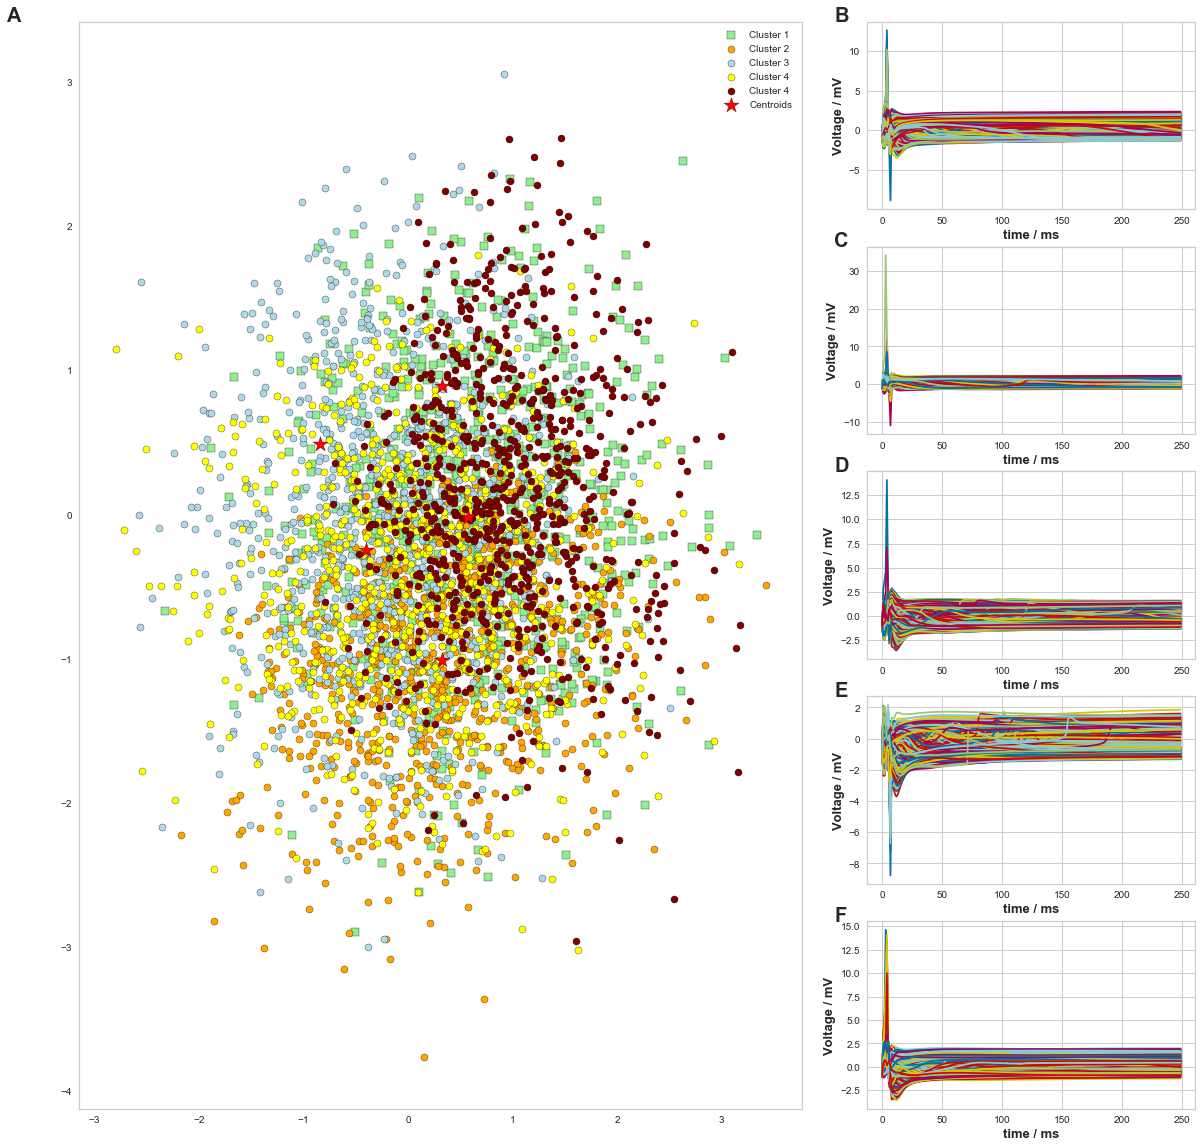

In [143]:

import string

fig = plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
ax = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan=3)


ax.scatter(X_scores[y_km == 0, 0],
            X_scores[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
ax.scatter(X_scores[y_km == 1, 0],
           X_scores[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
ax.scatter(X_scores[y_km == 2, 1],
           X_scores[y_km == 2, 2],
            s=50, c='lightblue',
            marker='o', edgecolor='black',
            label='Cluster 3')
ax.scatter(X_scores[y_km == 3, 2],
           X_scores[y_km == 3, 3],
            s=50, c='yellow',
            marker='o', edgecolor='black',
            label='Cluster 4')
ax.scatter(X_scores[y_km == 4, 3],
           X_scores[y_km == 4, 4],
            s=50, c='maroon',
            marker='o', edgecolor='black',
            label='Cluster 4')
ax.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
ax.legend(scatterpoints=1)
ax.grid()
ax.text(-0.1, 1., string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(5,3,3)
plt.plot(Y_data_0.T)
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.xlabel('time / ms',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')
plt.tight_layout()


plt.subplot(5,3,6)
plt.plot(Y_data_1.T)
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.xlabel('time / ms',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')
            
plt.subplot(5,3,9)
plt.plot(Y_data_2.T)
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.xlabel('time / ms',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')
            
plt.subplot(5,3,12)
plt.plot(Y_data_3.T)
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.xlabel('time / ms',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[4], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(5,3,15)
plt.plot(Y_data_4.T)
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.xlabel('time / ms',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[5], transform=ax.transAxes, 
            size=20, weight='bold')
            

ax = plt.gca()
# ax.text(-0.1, 1., string.ascii_uppercase[5], transform=ax.transAxes, 
#             size=20, weight='bold')

plt.tight_layout()

# Regression Coefficient Plots

In [144]:
headers = ['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
       'alpha_2(per_ms)', 'alpha_3(per_ms)', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'tau_R(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)',
       'K_L(mM)', 'a', 'b', 'c', 'd', 'tau_s_ss']

In [145]:
global_reg = pd.DataFrame(global_pls.coef_)
local_0_reg = pd.DataFrame(local_pls_0.coef_)
local_1_reg = pd.DataFrame(local_pls_1.coef_)
local_2_reg = pd.DataFrame(local_pls_2.coef_)
local_3_reg = pd.DataFrame(local_pls_3.coef_)
local_4_reg = pd.DataFrame(local_pls_4.coef_)

In [147]:
global_reg = global_reg.T

In [148]:
global_reg.columns = ['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
       'alpha_2(per_ms)', 'alpha_3(per_ms)', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'tau_R(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)',
       'K_L(mM)', 'a', 'b', 'c', 'd', 'tau_s_ss']

In [149]:
global_reg

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),...,tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.021552,0.012132,0.221033,-0.001113,-0.091045,0.036200,0.126658,0.748052,0.141108,0.103639,...,-0.027112,0.042135,0.004151,0.050884,-0.010116,-0.000756,0.001502,-0.008503,0.025244,0.003920
2,-0.054104,0.015461,0.226792,0.003910,-0.099346,0.035409,0.139279,0.711564,0.195234,0.114177,...,-0.025655,0.031318,0.004187,0.024743,0.014915,-0.000048,0.004176,-0.008318,0.025401,0.001124
3,-0.085017,0.014472,0.180776,0.015658,-0.082908,0.028085,0.120448,0.525455,0.197317,0.099836,...,-0.018933,0.012389,0.003012,-0.008864,0.036626,0.002309,0.006972,-0.005642,0.019792,-0.003507
4,-0.104861,0.010166,0.114766,0.015688,-0.049272,0.017285,0.079005,0.259657,0.157132,0.070039,...,-0.009635,-0.000378,-0.003536,-0.027602,0.057282,0.004525,0.011092,0.001011,0.010639,-0.006553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.361439,0.015866,0.163360,0.052245,-0.052300,0.013724,0.090112,0.068545,0.144706,0.072983,...,0.000900,-0.034220,0.005431,-0.116519,0.222544,0.008638,0.012082,0.005608,0.004888,-0.019091
246,-0.361382,0.015870,0.163102,0.052471,-0.052285,0.013734,0.090165,0.068697,0.144756,0.073073,...,0.000882,-0.034360,0.005441,-0.116761,0.222380,0.008665,0.012105,0.005607,0.004896,-0.019126
247,-0.361322,0.015873,0.162847,0.052698,-0.052275,0.013745,0.090221,0.068861,0.144813,0.073160,...,0.000864,-0.034500,0.005454,-0.117002,0.222213,0.008693,0.012127,0.005604,0.004903,-0.019160
248,-0.361268,0.015876,0.162598,0.052926,-0.052265,0.013756,0.090276,0.069024,0.144876,0.073244,...,0.000847,-0.034640,0.005469,-0.117240,0.222049,0.008720,0.012148,0.005600,0.004911,-0.019195


In [150]:
global_reg.describe()

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),...,tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,-0.349135,0.011182,0.222587,-0.001801,-0.048180,0.014915,0.070408,0.079172,0.118174,0.047496,...,0.002965,0.010914,-0.001174,-0.031802,0.233823,0.004370,0.008572,0.006773,0.003469,-0.010872
std,0.058467,0.007594,0.054325,0.044327,0.013608,0.003706,0.026293,0.072183,0.044762,0.031606,...,0.003922,0.041967,0.006176,0.082968,0.048632,0.004184,0.003027,0.003263,0.003251,0.006777
min,-0.369968,-0.022916,0.000000,-0.089809,-0.099346,0.000000,-0.028165,-0.047170,0.000000,-0.072870,...,-0.027112,-0.034778,-0.015603,-0.117477,-0.010116,-0.002111,0.000000,-0.009376,-0.005935,-0.020663
25%,-0.368663,0.010967,0.179719,-0.033342,-0.052642,0.013447,0.063633,0.064260,0.098280,0.037908,...,0.001735,-0.023152,-0.004677,-0.097277,0.229134,0.000937,0.006026,0.005974,0.002577,-0.016730
50%,-0.365061,0.014421,0.208528,0.011132,-0.052219,0.013566,0.080242,0.065518,0.126958,0.060113,...,0.002758,-0.003649,0.000655,-0.063456,0.242296,0.004861,0.009755,0.007165,0.003879,-0.012901
75%,-0.361710,0.015463,0.263655,0.035958,-0.050139,0.014152,0.086628,0.070995,0.139812,0.067907,...,0.004899,0.034834,0.004225,0.010915,0.258591,0.007167,0.010870,0.008523,0.004503,-0.005439
max,0.000000,0.018787,0.323835,0.053154,0.015402,0.036200,0.139279,0.748052,0.450107,0.114177,...,0.010896,0.103838,0.005483,0.160144,0.272202,0.022410,0.016688,0.009717,0.025401,0.003920


In [151]:
g = global_pls.coef_
p0= local_pls_0.coef_
p1= local_pls_1.coef_
p2=local_pls_2.coef_
p3=local_pls_3.coef_
p4=local_pls_4.coef_

In [152]:
coeffs= np.array([g,p0,p1,p2,p3,p4]) #coefficients of various PLSR models

In [153]:
coeffs.shape

(6, 76, 250)

In [154]:
coeffs.T.shape

(250, 76, 6)

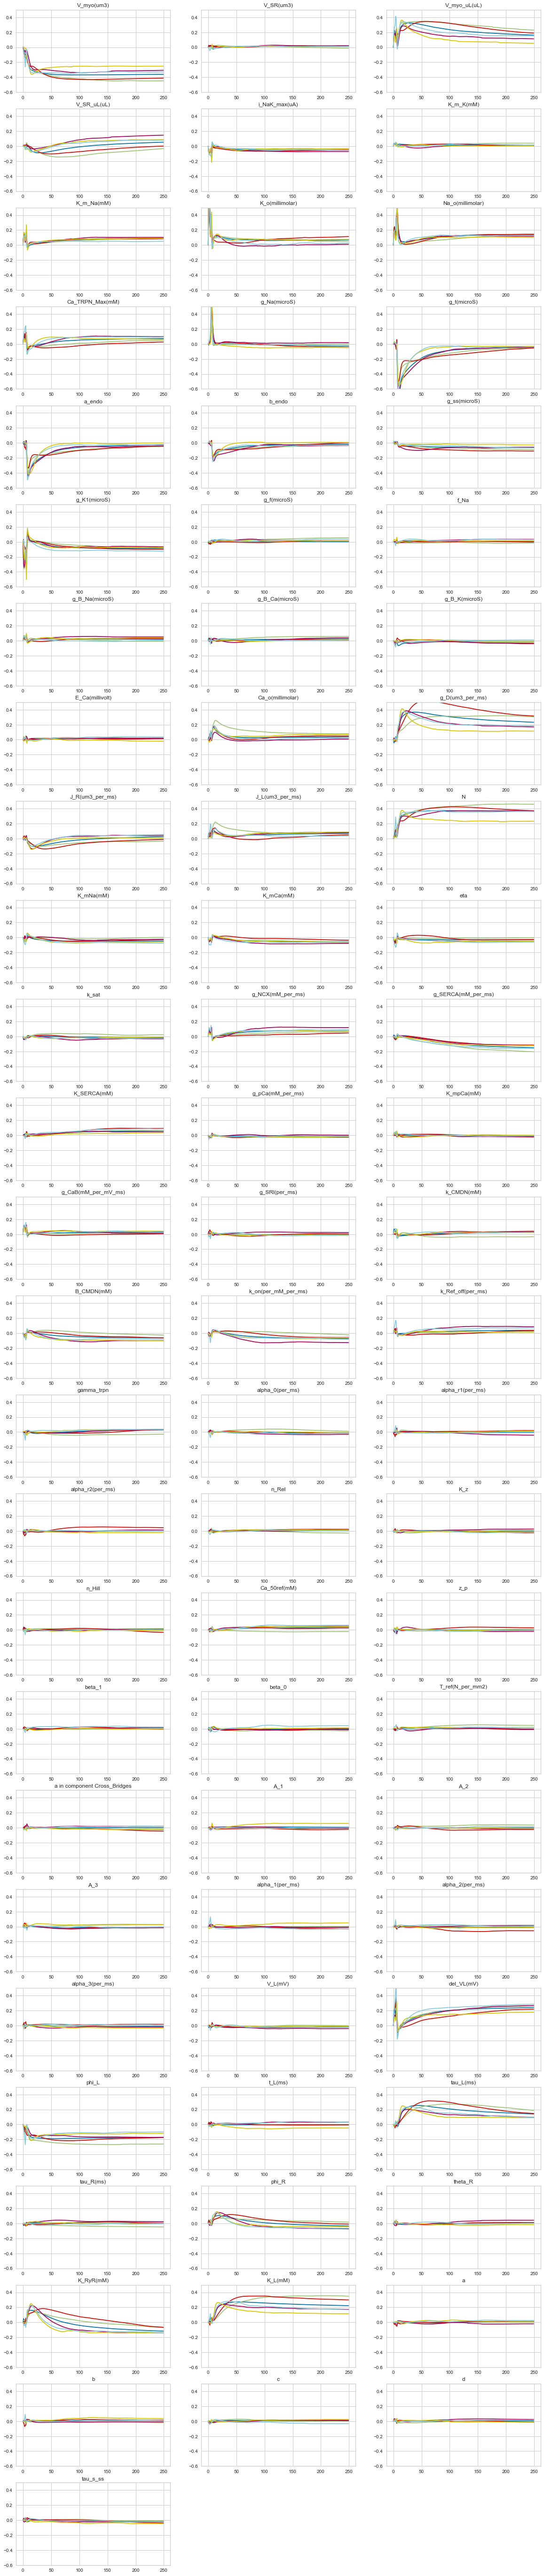

In [155]:
x_axis = np.array([i for i in range(250)])

plt.figure(figsize=(20,100))
for i in range(len(headers)):
  plt.subplot(26,3,i+1)
  plt.title(headers[i])
  plt.plot(x_axis[0:],coeffs[:,i,:].T)  
  plt.ylim(-0.6,0.5)


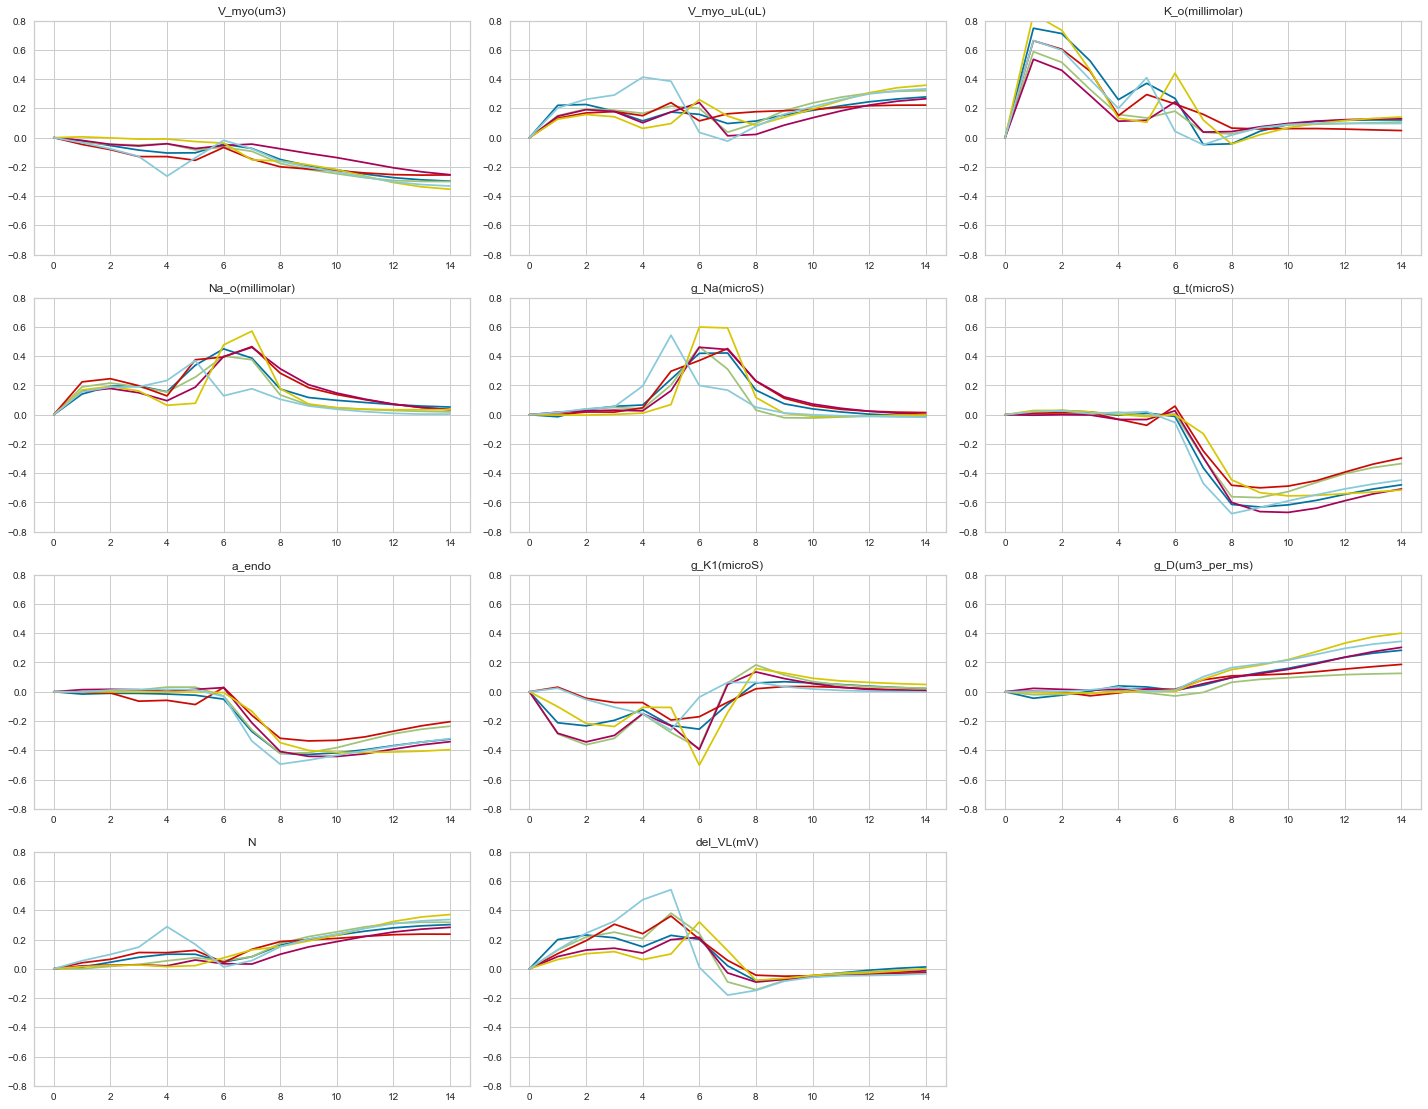

In [156]:
plt.figure(figsize=(20,100))
x_axis = np.array([i for i in range(15)])
ctr = 0
for i in range(coeffs.shape[1]):
  
  if np.any(abs(np.squeeze(coeffs[:,i,:15])) > 0.3):
    ctr +=1
    plt.subplot(26,3,ctr)
    plt.title(headers[i])
    plt.plot(x_axis[0:],coeffs[:,i,:15].T);
    plt.ylim(-0.8,0.8)
plt.tight_layout()

In [157]:
Y_data = Total_Y_data[1068:]
Y_data_0 = Y_data[Y_data.index.isin(X_cluster_0.index)]
Y_data_1 = Y_data[Y_data.index.isin(X_cluster_1.index)]
Y_data_2 = Y_data[Y_data.index.isin(X_cluster_2.index)]
Y_data_3 = Y_data[Y_data.index.isin(X_cluster_3.index)]
Y_data_4 = Y_data[Y_data.index.isin(X_cluster_4.index)]

In [158]:
x_axis = x_axis = np.array([i*0.25 for i in range(250)])

In [159]:
mu0 = np.mean(Y_data,axis=0)
std0= np.std(Y_data,axis=0)
upper0 = mu0+std0
lower0 = mu0-std0

mu1 = np.mean(Y_data_0,axis=0)
std1= np.std(Y_data_0,axis=0)
upper1 = mu1+std1
lower1 = mu1-std1


mu2 = np.mean(Y_data_1,axis=0)
std2= np.std(Y_data_1,axis=0)
upper2 = mu2+std2
lower2 = mu2-std2


mu3= np.mean(Y_data_2,axis=0)
std3= np.std(Y_data_2,axis=0)
upper3 = mu3+std3
lower3 = mu3-std3


mu4 = np.mean(Y_data_3,axis=0)
std4= np.std(Y_data_3,axis=0)
upper4 = mu4+std4
lower4 = mu4-std4


mu5 = np.mean(Y_data_4,axis=0)
std5= np.std(Y_data_4,axis=0)
upper5 = mu5+std5
lower5 = mu5-std5

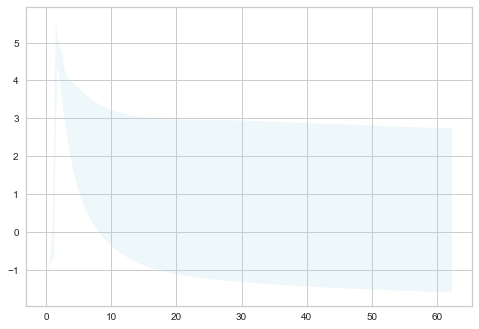

In [160]:
plt.fill_between(x_axis,lower0*0.05+50*0.05,upper0*0.05+50*0.05,facecolor='lightblue',alpha=0.2);


In [161]:
coeffs.shape

(6, 76, 250)

In [162]:
## Reg ko plot

In [163]:
x_axis = np.array([i*0.25 for i in range(250)])

In [164]:
g.shape

(76, 250)

## Plotting coefficients > 0.3 of absolute value

In [165]:
global_reg.columns

Index(['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
   

In [166]:
 global_reg.iloc[:, [0,2,7,8,10,11,12,15,23,26,62]]

,V_myo(um3),V_myo_uL(uL),K_o(millimolar),Na_o(millimolar),g_Na(microS),g_t(microS),a_endo,g_K1(microS),g_D(um3_per_ms),N,del_VL(mV)
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.021552,0.221033,0.748052,0.141108,-0.014155,0.017053,-0.016087,-0.212186,-0.044547,0.011260,0.199702
2,-0.054104,0.226792,0.711564,0.195234,0.034616,0.028517,-0.010612,-0.233076,-0.023547,0.044900,0.231108
3,-0.085017,0.180776,0.525455,0.197317,0.057142,0.018968,-0.011061,-0.195501,0.003002,0.078336,0.211858
4,-0.104861,0.114766,0.259657,0.157132,0.066304,-0.003887,-0.015871,-0.122686,0.039589,0.099741,0.150290
...,...,...,...,...,...,...,...,...,...,...,...
245,-0.361439,0.163360,0.068545,0.144706,-0.023974,-0.037257,-0.024097,-0.087680,0.233033,0.363040,0.240158
246,-0.361382,0.163102,0.068697,0.144756,-0.024096,-0.037109,-0.023986,-0.087697,0.232733,0.362969,0.240274
247,-0.361322,0.162847,0.068861,0.144813,-0.024213,-0.036967,-0.023880,-0.087717,0.232428,0.362897,0.240393
248,-0.361268,0.162598,0.069024,0.144876,-0.024325,-0.036840,-0.023784,-0.087737,0.232128,0.362832,0.240511


In [167]:
g.shape

(76, 250)

In [168]:
g = g[[0,2,7,8,10,11,12,15,23,26,62], :]
p0 = p0[[0,2,7,8,10,11,12,15,23,26,62], :]
p1 = p1[[0,2,7,8,10,11,12,15,23,26,62], :]
p2 = p2[[0,2,7,8,10,11,12,15,23,26,62], :]
p3 = p3[[0,2,7,8,10,11,12,15,23,26,62], :]
p4  = p4[[0,2,7,8,10,11,12,15,23,26,62], :]

In [171]:
headers = ['V_myo(um3)', 'V_myo_uL(uL)', 'K_o(millimolar)', 'Na_o(millimolar)',
       'g_Na(microS)', 'g_t(microS)', 'a_endo',"g_K1(microS)", 'g_D(um3_per_ms)', 'N', 'del_VL(mV)']

In [174]:
len(headers)

11

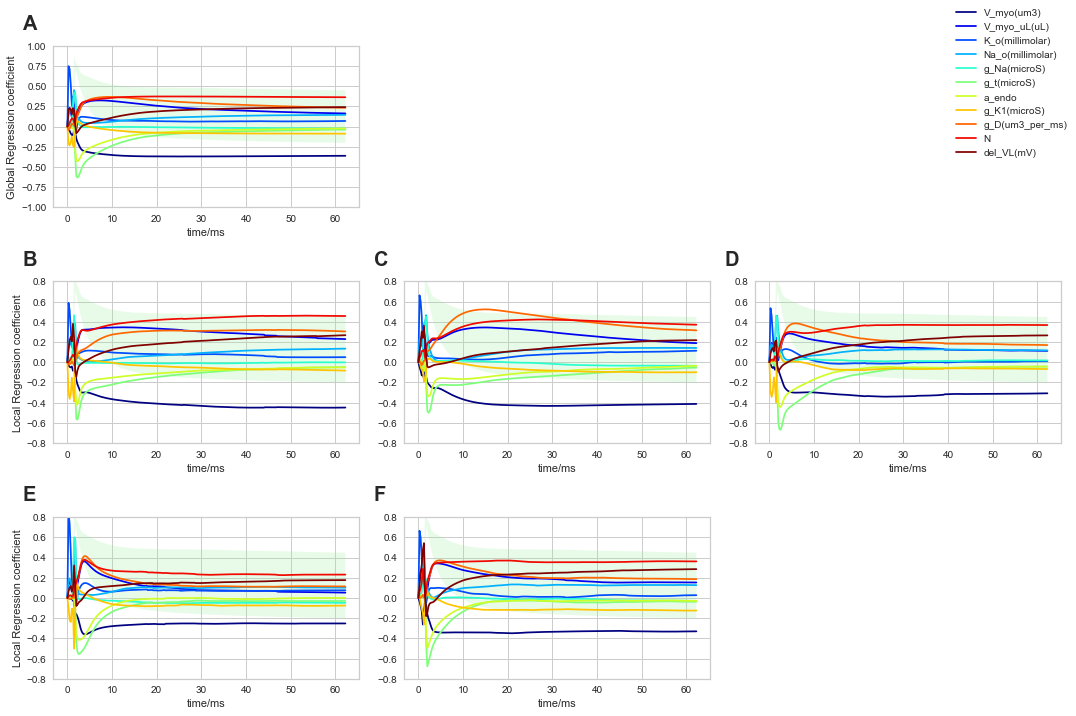

In [176]:
import string
n = 11
colors = plt.cm.jet(np.linspace(0,1,n))

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.fill_between(x_axis,lower0*0.0075+55*0.0075,upper0*0.0075+55*0.0075,facecolor='lightgreen',alpha=0.2);
for i in range(11):
  plt.plot(x_axis[0:],g[i,:],label=headers[i],color = colors[i])
plt.ylim(-1,1)
plt.ylabel('Global Regression coefficient')
plt.xlabel('time/ms')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(3,3,4)

plt.fill_between(x_axis,lower0*0.0075+55*0.0075,upper0*0.0075+55*0.0075,facecolor='lightgreen',alpha=0.2);
for i in range(11):
  plt.plot(x_axis[0:],p0[i,:],label=headers[i],color = colors[i])
plt.ylim(-0.8,0.8)
plt.ylabel('Local Regression coefficient')
plt.xlabel('time/ms')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,3,5)
plt.fill_between(x_axis,lower0*0.0075+55*0.0075,upper0*0.0075+55*0.0075,facecolor='lightgreen',alpha=0.2);
for i in range(11):
  plt.plot(x_axis[0:],p1[i,:],label=headers[i],color = colors[i])

plt.ylim(-0.8,0.8)
plt.xlabel('time/ms')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,3,6)

plt.fill_between(x_axis,lower0*0.0075+55*0.0075,upper0*0.0075+55*0.0075,facecolor='lightgreen',alpha=0.2);
for i in range(11):
  plt.plot(x_axis[0:],p2[i,:],label=headers[i],color = colors[i])

plt.ylim(-0.8,0.8)
plt.xlabel('time/ms')


ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(3,3,7)

plt.fill_between(x_axis,lower0*0.0075+55*0.0075,upper0*0.0075+55*0.0075,facecolor='lightgreen',alpha=0.2);
for i in range(11):
  plt.plot(x_axis[0:],p3[i,:],label=headers[i],color = colors[i])

plt.ylim(-0.8,0.8)
plt.xlabel('time/ms')
plt.ylabel('Local Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[4], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(3,3,8)

plt.fill_between(x_axis,lower0*0.0075+55*0.0075,upper0*0.0075+55*0.0075,facecolor='lightgreen',alpha=0.2);
for i in range(11):
  plt.plot(x_axis[0:],p4[i,:],label=headers[i],color = colors[i])

plt.ylim(-0.8,0.8)
plt.xlabel('time/ms')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[5], transform=ax.transAxes, 
            size=20, weight='bold')




plt.figlegend(headers[:11],loc='upper right')
plt.tight_layout()